## Clustering FW

### Import Data

In [1]:
import pandas as pd 

final_df = pd.read_csv('players_rating_potential_database.csv')

In [2]:
final_df_mid = final_df[final_df["Position"] == "Midfielders"].copy()

In [3]:
final_df_mid

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential
1824,Scott McTominay,1996-12-08,SerieA,Napoli,Right,Scotland,Midfielders,2938,0.37,0.12,...,0.00,0.0,4.38,2.02,1.53,56.9,1838,29.0,78.294474,78.294474
1825,Andre-Frank Zambo Anguissa,1995-11-16,SerieA,Napoli,Right,Cameroon,Midfielders,2852,0.19,0.13,...,0.03,0.0,4.73,2.11,1.58,57.3,1838,30.0,78.269744,78.269744
1826,Billy Gilmour,2001-06-11,SerieA,Napoli,Right,Scotland,Midfielders,1177,0.00,0.08,...,0.00,0.0,4.89,0.69,0.76,47.4,1838,24.0,77.651633,79.579863
1827,Henrikh Mkhitaryan,1989-01-21,SerieA,Internazionale,Right,Armenia,Midfielders,2396,0.04,0.15,...,0.00,0.0,4.92,0.86,0.49,63.9,1933,36.0,80.906540,80.906540
1828,Nicolò Barella,1997-02-07,SerieA,Internazionale,Right,Italy,Midfielders,2493,0.11,0.22,...,0.00,0.0,5.96,0.94,0.90,51.0,1933,28.0,82.227037,82.227037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,Jack Taylor,1998-06-23,PremierLeague,Ipswich Town,Left,Republic of Ireland,Midfielders,860,0.10,0.00,...,0.00,0.0,5.55,0.73,0.84,46.7,1797,27.0,72.438408,72.438408
2433,Flynn Downes,1999-01-20,PremierLeague,Southampton,Right,England,Midfielders,2151,0.04,0.00,...,0.00,0.0,3.47,0.71,0.71,50.0,1782,26.0,75.083788,75.083788
2434,Joe Aribo,1996-07-21,PremierLeague,Southampton,Left,Nigeria,Midfielders,2013,0.13,0.00,...,0.04,0.0,5.01,1.12,1.07,51.0,1782,29.0,75.038365,75.038365
2435,Lesley Ugochukwu,2004-03-26,PremierLeague,Southampton,Right,France,Midfielders,1655,0.05,0.05,...,0.05,0.0,3.64,1.09,0.98,52.6,1782,21.0,75.057848,80.599591


In [ ]:
# 2. Define target and input features //
meta_cols = ['Player', 'Position', 'Club', 'Birthdate'] 

midfielders_features = [
    'Assists', 'npxG + xAG',                          # Playmaking and shot creation
    'Progressive Carries', 'Progressive Carrying Distance', # Ball progression through midfield
    'Touches (Att 3rd)', 'Touches (Def 3rd)',         # Influence in both halves
    'Pass Completion %', 'Live-ball Passes',          # Ball security
    'Progressive Passes', 'Progressive Passing Distance', # Advancing team forward
    'Passes Attempted (Long)', 'Pass Completion % (Long)',# Range of passing
    'Passes into Final Third', 'Switches',            # Penetrative and expansive passing
    'Through Balls',                                  # Breaking lines
    'SCA (Live-ball Pass)', 'SCA (Take-On)',          # Shot creation
    'SCA (Defensive Action)',                         # Disrupting opponents before shots
    'GCA (Live-ball Pass)', 'GCA (Defensive Action)', # Goal creation and last-ditch defending
    'Tackles (Mid 3rd)',                              # Defensive work rate in midfield
    'Tkl+Int',                                        # Ball-winning combined metric
    'Blocks',                                         # Blocking passes/shots
    'Ball Recoveries',                                # Regaining possession
    'Fouls Committed', 'Fouls Drawn',                 # Physical/technical battle
    'Aerials Won'                                     # Midfield duels                                     
]

In [5]:
df_meta = final_df_mid[meta_cols]

X = final_df_mid[midfielders_features]

X

,Assists,npxG + xAG,Progressive Carries,Progressive Carrying Distance,Touches (Att 3rd),Touches (Def 3rd),Pass Completion %,Live-ball Passes,Progressive Passes,Progressive Passing Distance,...,SCA (Defensive Action),GCA (Live-ball Pass),GCA (Defensive Action),Tackles (Mid 3rd),Tkl+Int,Blocks,Ball Recoveries,Fouls Committed,Fouls Drawn,Aerials Won
1824,0.12,0.31,1.72,61.05,11.76,7.23,84.1,27.85,3.43,89.75,...,0.06,0.18,0.0,0.83,2.05,0.67,4.38,1.38,1.84,2.02
1825,0.13,0.21,0.76,47.02,14.55,10.10,84.5,46.70,4.54,156.52,...,0.13,0.19,0.0,0.88,2.43,0.76,4.73,1.23,1.14,2.11
1826,0.08,0.18,0.84,75.78,12.01,20.11,88.5,67.14,5.12,289.35,...,0.00,0.31,0.0,0.69,2.52,0.46,4.89,1.07,1.22,0.69
1827,0.15,0.16,2.70,105.14,20.32,9.73,87.4,56.08,7.48,206.56,...,0.00,0.41,0.0,0.60,2.25,1.09,4.92,1.24,0.90,0.86
1828,0.22,0.24,2.27,114.01,22.89,11.99,82.1,62.89,8.48,279.60,...,0.07,0.51,0.0,0.72,2.24,0.94,5.96,0.90,1.19,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0.00,0.14,1.15,82.78,10.78,16.85,82.9,43.01,4.50,175.08,...,0.21,0.21,0.0,1.15,3.03,1.26,5.55,1.67,0.52,0.73
2433,0.00,0.07,1.21,76.40,9.50,16.86,90.4,45.15,2.76,121.05,...,0.04,0.04,0.0,0.88,3.39,1.17,3.47,2.09,1.63,0.71
2434,0.00,0.19,1.61,90.36,13.37,13.99,88.8,46.14,3.35,117.59,...,0.00,0.04,0.0,1.07,3.00,1.25,5.01,0.89,1.25,1.12
2435,0.05,0.10,1.58,66.83,9.19,11.69,85.0,37.90,2.66,113.17,...,0.00,0.00,0.0,1.63,3.48,1.47,3.64,1.69,0.87,1.09


### PCA

In [6]:
# Now ready for scaling and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components explaining 95% variance: {X_pca.shape[1]}")

Number of components explaining 95% variance: 18


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans_metrics(X, k_range):
    inertias = []
    silhouettes = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    # Plot Inertia (WCSS)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, marker='o')
    plt.title('Within-Cluster Sum of Squares')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.grid(True)

    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouettes, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouettes

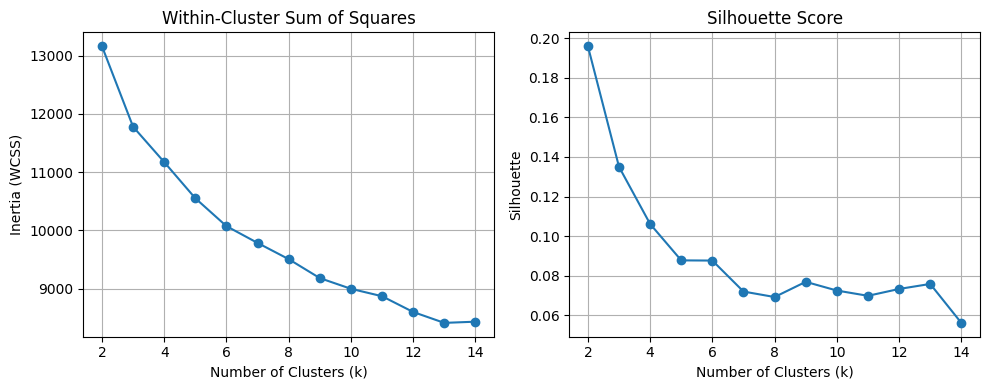

In [8]:
k_range = range(2, 15)
inertias, silhouettes = plot_kmeans_metrics(X_pca, k_range)

In [9]:
final_kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_pca)

X = X.copy()  # Make an explicit copy if X came from slicing
X['cluster'] = cluster_labels

### TSNE & UMAP

In [10]:
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_umap(X, cluster_labels, df_meta, n_neighbors=15, min_dist=0.1):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    X_umap = reducer.fit_transform(X)

    df_umap = pd.DataFrame(X_umap, columns=["UMAP-1", "UMAP-2"])
    df_umap['Cluster'] = cluster_labels
    df_umap['Player'] = df_meta['Player'].values
    df_umap['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_umap, x='UMAP-1', y='UMAP-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('UMAP Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_umap


/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


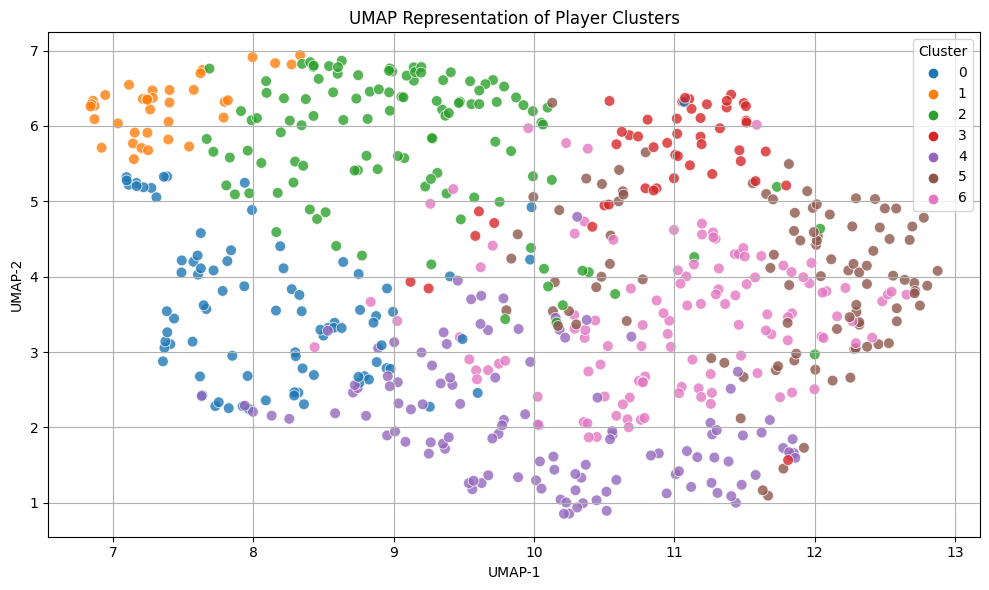

In [11]:
df_umap = plot_umap(X_pca, cluster_labels, df_meta)

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=200, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate,
                n_iter=n_iter, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X_pca)

    df_tsne = pd.DataFrame(X_tsne, columns=["TSNE-1", "TSNE-2"])
    df_tsne['Cluster'] = cluster_labels
    df_tsne['Player'] = df_meta['Player'].values
    df_tsne['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_tsne, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('t-SNE (Tuned) Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_tsne

/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


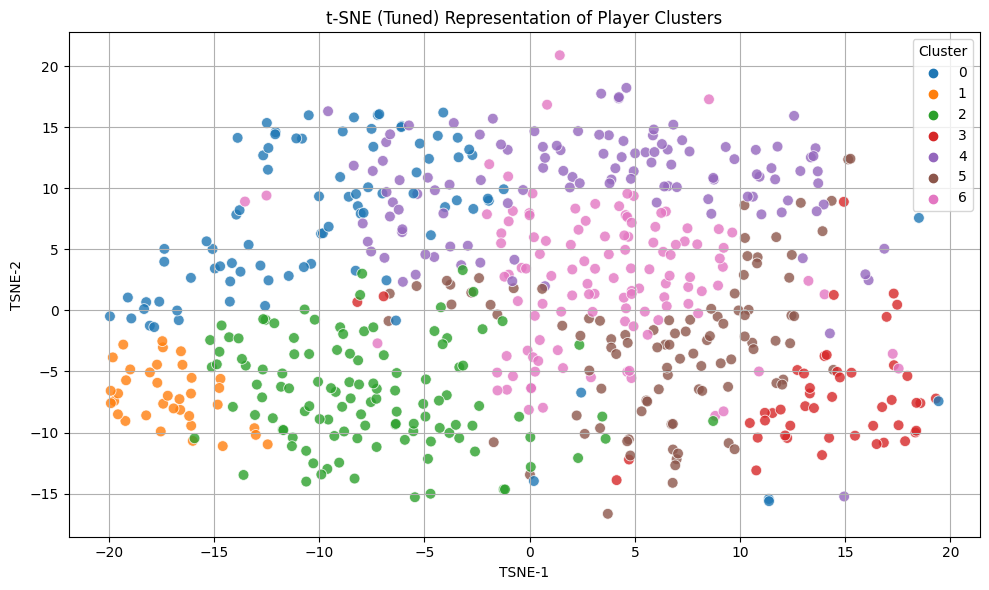

In [13]:
df_tsne = plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=300)

### Playstyle defintion

In [14]:
final_df_mid["Cluster"] = cluster_labels

final_df_mid

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
1824,Scott McTominay,1996-12-08,SerieA,Napoli,Right,Scotland,Midfielders,2938,0.37,0.12,...,0.0,4.38,2.02,1.53,56.9,1838,29.0,78.294474,78.294474,4
1825,Andre-Frank Zambo Anguissa,1995-11-16,SerieA,Napoli,Right,Cameroon,Midfielders,2852,0.19,0.13,...,0.0,4.73,2.11,1.58,57.3,1838,30.0,78.269744,78.269744,6
1826,Billy Gilmour,2001-06-11,SerieA,Napoli,Right,Scotland,Midfielders,1177,0.00,0.08,...,0.0,4.89,0.69,0.76,47.4,1838,24.0,77.651633,79.579863,2
1827,Henrikh Mkhitaryan,1989-01-21,SerieA,Internazionale,Right,Armenia,Midfielders,2396,0.04,0.15,...,0.0,4.92,0.86,0.49,63.9,1933,36.0,80.906540,80.906540,2
1828,Nicolò Barella,1997-02-07,SerieA,Internazionale,Right,Italy,Midfielders,2493,0.11,0.22,...,0.0,5.96,0.94,0.90,51.0,1933,28.0,82.227037,82.227037,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,Jack Taylor,1998-06-23,PremierLeague,Ipswich Town,Left,Republic of Ireland,Midfielders,860,0.10,0.00,...,0.0,5.55,0.73,0.84,46.7,1797,27.0,72.438408,72.438408,5
2433,Flynn Downes,1999-01-20,PremierLeague,Southampton,Right,England,Midfielders,2151,0.04,0.00,...,0.0,3.47,0.71,0.71,50.0,1782,26.0,75.083788,75.083788,6
2434,Joe Aribo,1996-07-21,PremierLeague,Southampton,Left,Nigeria,Midfielders,2013,0.13,0.00,...,0.0,5.01,1.12,1.07,51.0,1782,29.0,75.038365,75.038365,6
2435,Lesley Ugochukwu,2004-03-26,PremierLeague,Southampton,Right,France,Midfielders,1655,0.05,0.05,...,0.0,3.64,1.09,0.98,52.6,1782,21.0,75.057848,80.599591,6


In [15]:
cluster_summary = X.copy()
summary_stats = cluster_summary.groupby('cluster').agg(['mean'])

In [16]:
mean_per_cluster = summary_stats.xs('mean', axis=1, level=1)
std_across_clusters = mean_per_cluster.std(axis=0)

summary_stats

,Assists,npxG + xAG,Progressive Carries,Progressive Carrying Distance,Touches (Att 3rd),Touches (Def 3rd),Pass Completion %,Live-ball Passes,Progressive Passes,Progressive Passing Distance,...,SCA (Defensive Action),GCA (Live-ball Pass),GCA (Defensive Action),Tackles (Mid 3rd),Tkl+Int,Blocks,Ball Recoveries,Fouls Committed,Fouls Drawn,Aerials Won
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.180000,0.327093,2.557442,90.990698,21.344884,7.988605,77.059302,39.456977,4.813953,155.957209,...,0.043140,0.266512,0.001744,0.682558,2.175465,0.960581,4.418721,1.125233,1.403721,0.571512
1,0.209444,0.270556,1.933889,132.717500,23.151667,15.035000,86.213889,75.750278,9.185833,376.013333,...,0.051667,0.390556,0.005556,0.897500,2.589167,1.064722,5.632222,0.910000,1.207500,0.609167
2,0.101842,0.180263,1.305175,94.188684,15.359649,14.542456,85.008772,58.073070,6.402018,266.652544,...,0.040263,0.224825,0.002456,0.928596,2.926754,1.045526,5.327456,1.239298,1.151316,0.851140
3,0.120833,0.189583,1.131875,66.530417,13.197083,12.201875,80.622917,42.574375,4.849167,182.814375,...,0.158542,0.203542,0.047708,1.401250,4.047083,1.416458,5.484583,1.680417,1.356667,1.209375
4,0.076174,0.205130,1.084348,49.395043,13.727826,9.717826,75.061739,32.804957,3.403217,127.961739,...,0.042000,0.118435,0.002348,0.900261,2.768174,1.191304,4.136087,1.497826,1.182087,1.282261
5,0.060619,0.119381,0.931753,64.415155,10.771340,14.921134,81.917526,44.518557,4.425670,186.283402,...,0.055773,0.131753,0.000309,1.365258,4.132577,1.460619,5.534536,1.867216,1.262371,1.369794
6,0.036154,0.108376,0.946068,64.972393,10.001966,13.604615,84.826496,43.546752,4.168034,175.995641,...,0.037436,0.091111,0.002051,0.850256,2.953419,1.180427,4.571197,1.255470,1.125983,0.992906


In [17]:
summary_stats.to_excel(('cluster_summary_mid_vf.xlsx'), index=True)

Top players per Cluster

In [18]:
def top_players_per_cluster(df, rating_col='Rating', cluster_col='Cluster', top_n=10):
    top_players = (
        df.sort_values(by=[cluster_col, rating_col], ascending=[True, False])
          .groupby(cluster_col)
          .head(top_n)
          .reset_index(drop=True)
    )
    return top_players[['Player', 'Position', 'Club', cluster_col, rating_col]]


In [24]:
top_10_per_cluster = top_players_per_cluster(final_df_mid, rating_col='Rating', cluster_col='Cluster', top_n=10)
top_10_per_cluster

,Player,Position,Club,Cluster,Rating
0,Ismael Saibari,Midfielders,PSV Eindhoven,0,87.183206
1,Guus Til,Midfielders,PSV Eindhoven,0,84.377937
2,Jude Bellingham,Midfielders,Real Madrid,0,84.349361
3,Martin Ødegaard,Midfielders,Arsenal,0,84.327231
4,Declan Rice,Midfielders,Arsenal,0,82.698730
...,...,...,...,...,...
65,Boubacar Kamara,Midfielders,Aston Villa,6,76.576477
66,Vitaly Janelt,Midfielders,Brentford,6,76.455254
67,Remo Freuler,Midfielders,Bologna,6,76.415673
68,Ngal'Ayel Mukau,Midfielders,Lille,6,76.279440


In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(top_10_per_cluster)


                        Player     Position                 Club  Cluster  \
0               Ismael Saibari  Midfielders        PSV Eindhoven        0   
1                     Guus Til  Midfielders        PSV Eindhoven        0   
2              Jude Bellingham  Midfielders          Real Madrid        0   
3              Martin Ødegaard  Midfielders              Arsenal        0   
4                  Declan Rice  Midfielders              Arsenal        0   
5               İlkay Gündoğan  Midfielders      Manchester City        0   
6               James Maddison  Midfielders    Tottenham Hotspur        0   
7               Enzo Fernández  Midfielders              Chelsea        0   
8              Bruno Guimarães  Midfielders     Newcastle United        0   
9              Daniel Bragança  Midfielders          Sporting CP        0   
10           Exequiel Palacios  Midfielders           Leverkusen        1   
11                 Luka Modrić  Midfielders          Real Madrid        1   

### Spider Charts

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === STEP 0 — Inputs ===
features = [
    'Goals', 'Assists', 'npxG + xAG',                          # Playmaking and shot creation
    'Progressive Carries',                            # Ball progression through midfield
    'Touches (Att 3rd)',                              # Influence in both halves
    'Pass Completion %',                              # Ball security
    'Progressive Passes',                             # Advancing team forward
    'SCA (Live-ball Pass)',
    'Tkl+Int',                                        # Ball-winning combined metric
    'Ball Recoveries',                                # Regaining possession
    'Fouls Committed'             # Physical/technical battle
]

# Define custom cluster labels for each cluster index
cluster_names = {
    0: "Advanced Playmakers",
    1: "Tempo Dictators",
    2: "Vertical Connectors",
    3: "Supportive Engines",
    4: "All-Round Carriers",
    5: "Ball-Winning Specialists",
    6: "Hybrid Workhorses"
}

# Assuming your DataFrame with 300 players is named `df_players` and has a 'Cluster' column
cluster_sizes = final_df_mid.groupby("Cluster").size()

# Build the cluster_names dictionary
cluster_names = {
    cluster: (cluster_names[cluster], size)
    for cluster, size in cluster_sizes.items()
}

# Optional: display the result
cluster_names

{0: ('Advanced Playmakers', 86),
 1: ('Tempo Dictators', 36),
 2: ('Vertical Connectors', 114),
 3: ('Supportive Engines', 48),
 4: ('All-Round Carriers', 115),
 5: ('Ball-Winning Specialists', 97),
 6: ('Hybrid Workhorses', 117)}

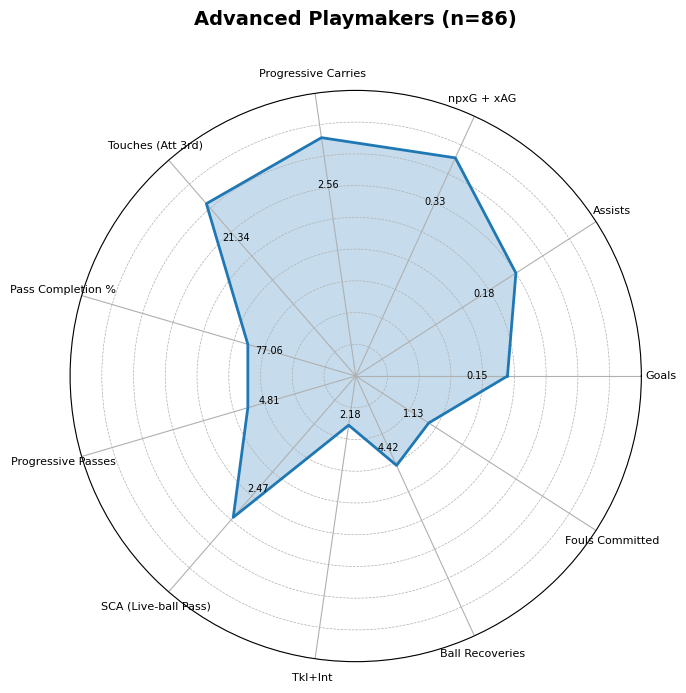

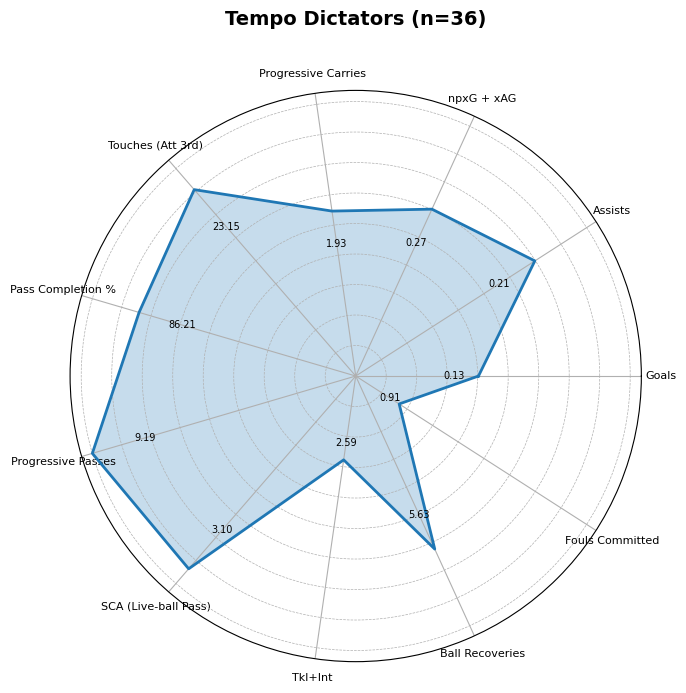

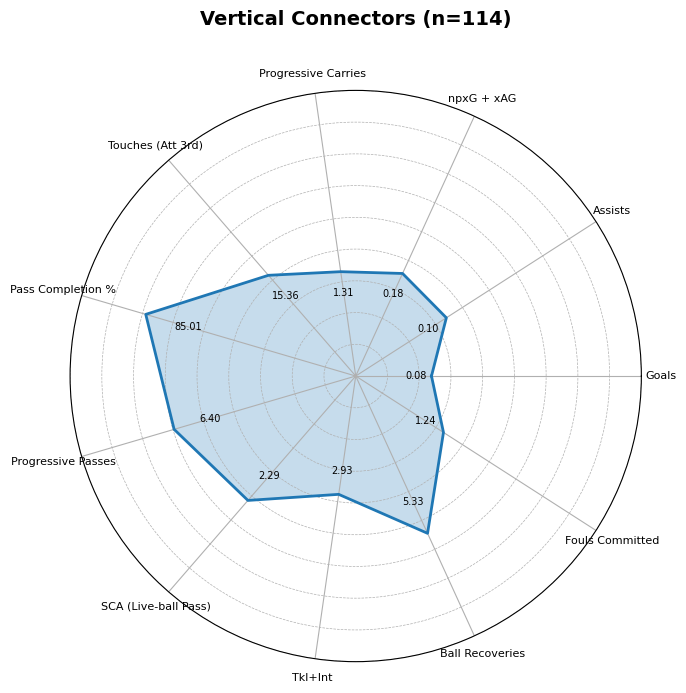

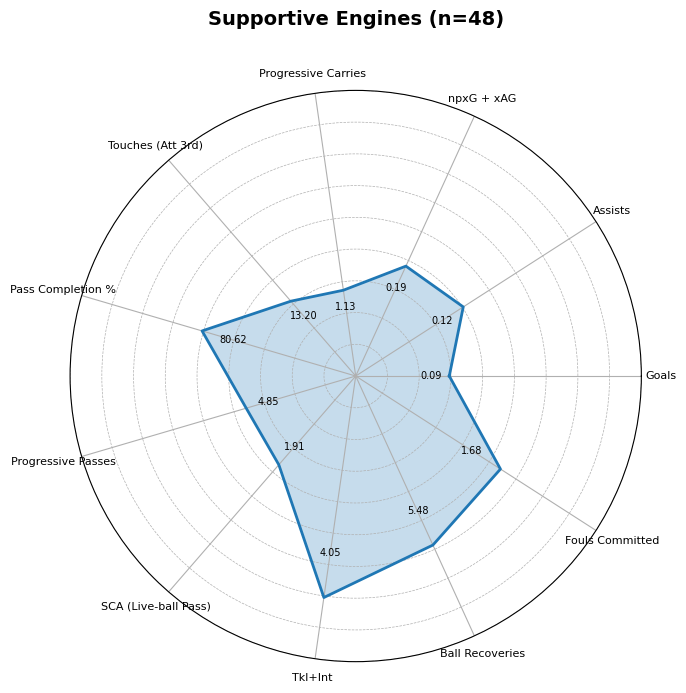

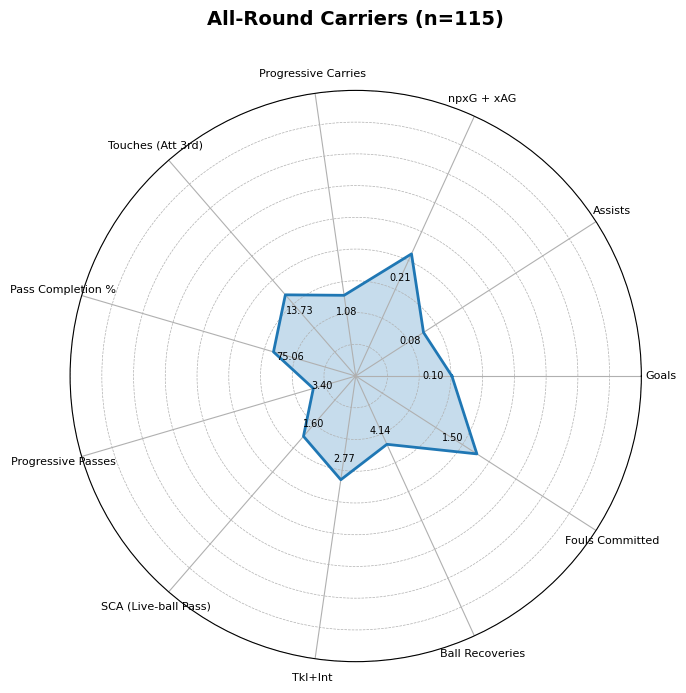

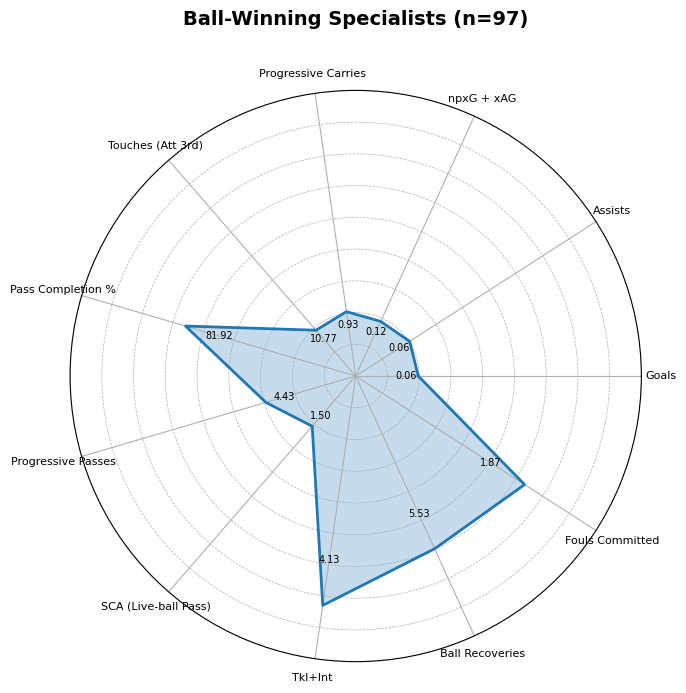

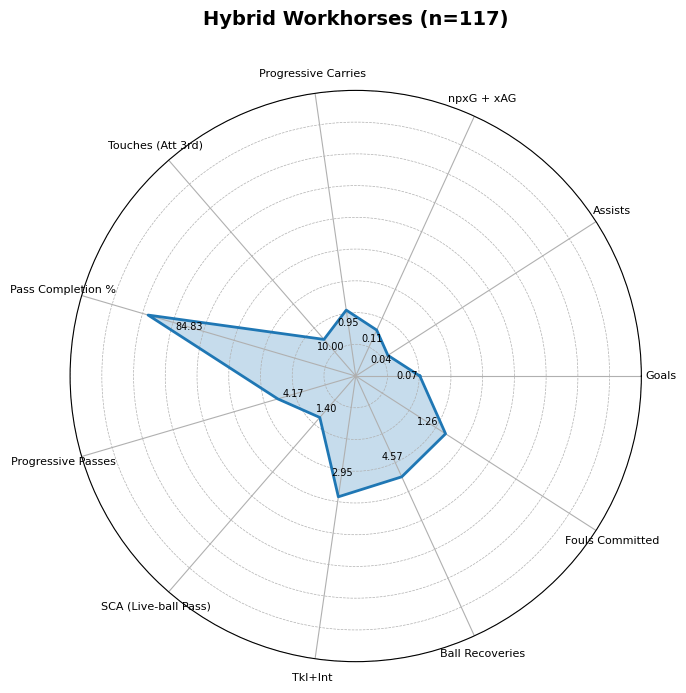

In [29]:
# === STEP 1 — Compute raw cluster means ===
raw_means = final_df_mid.groupby("Cluster")[features].mean()

# === STEP 2 — Compute 5th and 95th percentiles for full AM/W pool ===
lower_bounds = final_df_mid[features].quantile(0.05)
upper_bounds = final_df_mid[features].quantile(0.95)

# === STEP 3 — Normalize raw cluster means to build scaled radar profiles ===
range_vals = (upper_bounds - lower_bounds).replace(0, 1)
scaled_means = (raw_means - lower_bounds) / range_vals
scaled_means = scaled_means.clip(0, 1)

# === STEP 4 — Radar Chart Function ===
def create_annotated_radar(scaled_row, raw_row, cluster_id, title, n_lines=10):
    labels = scaled_row.index
    stats = scaled_row.values
    raw_stats = raw_row.values

    # Close the loop
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    raw_stats = np.concatenate((raw_stats, [raw_stats[0]]))
    angles += [angles[0]]

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    # Radar plot
    ax.plot(angles, stats, linewidth=2)
    ax.fill(angles, stats, alpha=0.25)

    # Inner gridlines (no % labels)
    ax.set_yticks(np.linspace(0, 1, n_lines))
    ax.set_yticklabels([])
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)

    # Annotate raw values near inner vertices (85% of scaled radius)
    for angle, scaled_val, raw_val in zip(angles[:-1], stats[:-1], raw_stats[:-1]):
        radius = scaled_val * 0.8
        ax.text(
            angle, radius, f"{raw_val:.2f}",
            ha='center', va='center', fontsize=7, color='black'
        )


    # Title with cluster name and size
    cluster_label, size = cluster_names[cluster_id]
    ax.set_title(f"{cluster_label} (n={size})", size=14, weight='bold', y=1.1)

    plt.tight_layout()
    return fig


# === STEP 5 — Plot or Export Charts ===
for cluster_id in raw_means.index:
    fig = create_annotated_radar(
        scaled_row=scaled_means.loc[cluster_id],
        raw_row=raw_means.loc[cluster_id],
        cluster_id=cluster_id,
        title=cluster_names[cluster_id][0]
    )
    plt.show()


### Find similar players Cosine Similarity

In [30]:
from sklearn.preprocessing import StandardScaler

# Step 1: Extract numerical features
feature_cols = [
    'npxG: Non-Penalty xG' , 'xAG: Exp. Assisted Goals',  # Direct goal involvement and advanced expected contribution
    'Progressive Carries', 'Progressive Carrying Distance', # Ball progression through midfield
    'Touches (Att 3rd)', 'Touches (Def 3rd)',         # Influence in both halves
    'Pass Completion %', 'Live-ball Passes',          # Ball security
    'Progressive Passes', 'Progressive Passing Distance', # Advancing team forward
    'Passes Attempted (Long)', 'Pass Completion % (Long)',# Range of passing
    'Passes into Final Third', 'Switches',            # Penetrative and expansive passing
    'Through Balls',                                  # Breaking lines
    'SCA (Live-ball Pass)', 'SCA (Take-On)',          # Shot creation
    'SCA (Defensive Action)',                         # Disrupting opponents before shots
    'GCA (Live-ball Pass)', 'GCA (Defensive Action)', # Goal creation and last-ditch defending
    'Tackles (Mid 3rd)',                              # Defensive work rate in midfield
    'Tkl+Int',                                        # Ball-winning combined metric
    'Blocks',                                         # Blocking passes/shots
    'Ball Recoveries',                                # Regaining possession
    'Fouls Committed', 'Fouls Drawn',                 # Physical/technical battle
    'Aerials Won'                                     # Midfield duels                                     
]

# Step 2: Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df_mid[feature_cols])

# Step 3: Create a scaled DataFrame to use
df_scaled = final_df_mid.copy()
df_scaled[feature_cols] = X_scaled

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_similarity(player1, player2, df, feature_cols):
    vec1 = df.loc[df['Player'] == player1, feature_cols].values.flatten()
    vec2 = df.loc[df['Player'] == player2, feature_cols].values.flatten()

    similarity = cosine_similarity([vec1], [vec2])[0, 0]
    return round(similarity * 100, 2)  # Percent similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_pca_cluster_similarity(player1, player2, df, df_pca, cluster_labels, boost=1.1):
    idx1 = df[df['Player'] == player1].index[0]
    idx2 = df[df['Player'] == player2].index[0]

    # Get row positions, not index values
    pos1 = df.index.get_loc(idx1)
    pos2 = df.index.get_loc(idx2)

    vec1 = df_pca[pos1]
    vec2 = df_pca[pos2]

    sim = cosine_similarity([vec1], [vec2])[0, 0] * 100
    if cluster_labels.iloc[pos1] == cluster_labels.iloc[pos2]:
        sim *= boost

    return round(min(sim, 100), 2)


In [33]:
def most_similar_players_pca_cluster(player_name, df, df_pca, cluster_labels, top_n=10, boost=1.1):
    player_index = {player: idx for idx, player in enumerate(df['Player'])}
    base_idx = player_index[player_name]
    base_vec = df_pca[base_idx]

    similarities = []
    for i, other_name in enumerate(df['Player']):
        if other_name == player_name:
            continue
        other_vec = df_pca[i]
        sim = cosine_similarity([base_vec], [other_vec])[0, 0] * 100
        if cluster_labels[i] == cluster_labels[base_idx]:
            sim *= boost
        similarities.append((other_name, round(min(sim, 100), 2)))

    return sorted(similarities, key=lambda x: -x[1])[:top_n]


In [34]:
most_similar_players_pca_cluster("Declan Rice", final_df_mid, X_pca, cluster_labels)

[('Gaëtan Perrin', 83.27),
 ('Denis Suárez', 81.79),
 ('İlkay Gündoğan', 79.48),
 ('Geovany Quenda', 77.11),
 ('Rodrigo Riquelme', 75.55),
 ('Samuel Lino', 75.46),
 ('Abdelkahar Kadri', 73.38),
 ('Martin Ødegaard', 72.8),
 ('Raúl Moro', 72.34),
 ('Anouar Ait El Hadj', 70.93)]

In [35]:
final_df_mid_reset = final_df_mid.reset_index(drop=True)
cluster_labels_reset = final_df_mid["Cluster"]  # Still aligned

compute_pca_cluster_similarity("Declan Rice", "Eduardo Camavinga", final_df_mid_reset, X_pca, cluster_labels_reset)

-12.57

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def compare_two_players_radar_pca(player1_name, player2_name, df, features, df_pca, cluster_labels, boost=1.1):
    # Step 1: Create index mapping once
    player_index = {player: idx for idx, player in enumerate(df['Player'])}

    # Step 2: Compute global scaling bounds
    lower_bounds = df[features].quantile(0.02)
    upper_bounds = df[features].quantile(0.98)
    range_vals = (upper_bounds - lower_bounds).replace(0, 1)

    # Step 3: Extract player stats
    p1_row = df[df["Player"] == player1_name].iloc[0]
    p2_row = df[df["Player"] == player2_name].iloc[0]
    p1_raw = p1_row[features]
    p2_raw = p2_row[features]

    # Step 4: Normalize
    p1_scaled = ((p1_raw - lower_bounds) / range_vals).clip(0, 1)
    p2_scaled = ((p2_raw - lower_bounds) / range_vals).clip(0, 1)

    # Step 5: PCA-based similarity score
    similarity_score = compute_pca_cluster_similarity(player1_name, player2_name, final_df_mid, df_pca, cluster_labels)

    # Step 6: Radar chart setup
    labels = features
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += [angles[0]]

    p1_scaled = np.append(p1_scaled.values, p1_scaled.values[0])
    p2_scaled = np.append(p2_scaled.values, p2_scaled.values[0])
    p1_raw = np.append(p1_raw.values, p1_raw.values[0])
    p2_raw = np.append(p2_raw.values, p2_raw.values[0])

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Step 7: Plot both players
    ax.plot(angles, p1_scaled, color="green", linewidth=2, label=player1_name)
    ax.fill(angles, p1_scaled, color="green", alpha=0.25)
    ax.plot(angles, p2_scaled, color="red", linewidth=2, label=player2_name)
    ax.fill(angles, p2_scaled, color="red", alpha=0.25)

    ax.set_yticks(np.linspace(0, 1, 10))
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Annotate raw stats
    for angle, val1, val2, scale1, scale2 in zip(angles[:-1], p1_raw[:-1], p2_raw[:-1], p1_scaled[:-1], p2_scaled[:-1]):
        ax.text(angle, scale1 * 0.9, f"{val1:.2f}", ha='center', va='center', fontsize=7, color='green')
        ax.text(angle, scale2 * 0.9, f"{val2:.2f}", ha='center', va='center', fontsize=7, color='red')

    # Title and similarity
    ax.set_title(f"{player1_name} vs {player2_name}", size=14, weight='bold', y=1.07)
    ax.text(0.5, 1.15, f"Similarity score (PCA): {similarity_score:.2f}", transform=ax.transAxes,
        ha='center', va='center', fontsize=10, color='gray')


    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=8)
    plt.tight_layout()
    plt.show()


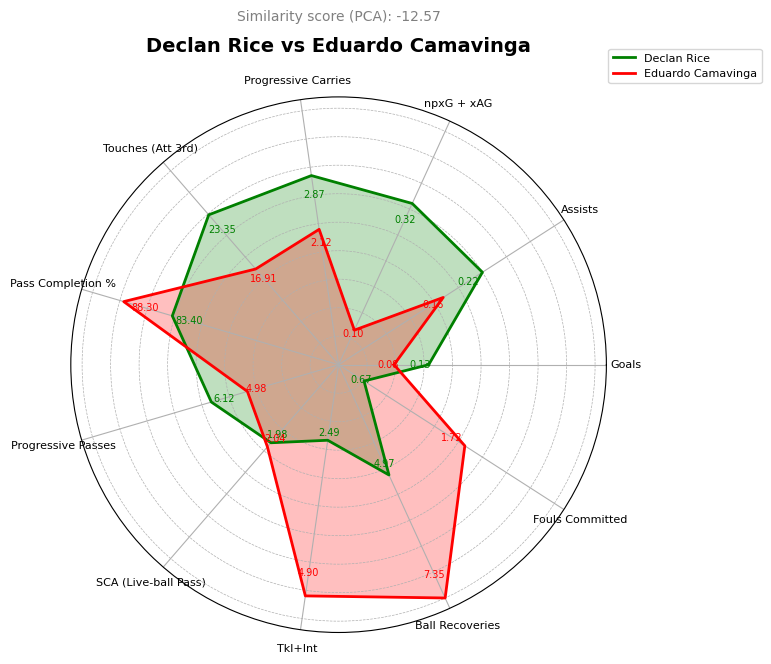

In [39]:
compare_two_players_radar_pca(
    player1_name="Declan Rice",
    player2_name="Eduardo Camavinga",
    df=final_df_mid,
    features=features,
    df_pca=X_pca,
    cluster_labels=final_df_mid["Cluster"]
)

### Final Naming + Export

In [40]:
final_df_mid

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
1824,Scott McTominay,1996-12-08,SerieA,Napoli,Right,Scotland,Midfielders,2938,0.37,0.12,...,0.0,4.38,2.02,1.53,56.9,1838,29.0,78.294474,78.294474,4
1825,Andre-Frank Zambo Anguissa,1995-11-16,SerieA,Napoli,Right,Cameroon,Midfielders,2852,0.19,0.13,...,0.0,4.73,2.11,1.58,57.3,1838,30.0,78.269744,78.269744,6
1826,Billy Gilmour,2001-06-11,SerieA,Napoli,Right,Scotland,Midfielders,1177,0.00,0.08,...,0.0,4.89,0.69,0.76,47.4,1838,24.0,77.651633,79.579863,2
1827,Henrikh Mkhitaryan,1989-01-21,SerieA,Internazionale,Right,Armenia,Midfielders,2396,0.04,0.15,...,0.0,4.92,0.86,0.49,63.9,1933,36.0,80.906540,80.906540,2
1828,Nicolò Barella,1997-02-07,SerieA,Internazionale,Right,Italy,Midfielders,2493,0.11,0.22,...,0.0,5.96,0.94,0.90,51.0,1933,28.0,82.227037,82.227037,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,Jack Taylor,1998-06-23,PremierLeague,Ipswich Town,Left,Republic of Ireland,Midfielders,860,0.10,0.00,...,0.0,5.55,0.73,0.84,46.7,1797,27.0,72.438408,72.438408,5
2433,Flynn Downes,1999-01-20,PremierLeague,Southampton,Right,England,Midfielders,2151,0.04,0.00,...,0.0,3.47,0.71,0.71,50.0,1782,26.0,75.083788,75.083788,6
2434,Joe Aribo,1996-07-21,PremierLeague,Southampton,Left,Nigeria,Midfielders,2013,0.13,0.00,...,0.0,5.01,1.12,1.07,51.0,1782,29.0,75.038365,75.038365,6
2435,Lesley Ugochukwu,2004-03-26,PremierLeague,Southampton,Right,France,Midfielders,1655,0.05,0.05,...,0.0,3.64,1.09,0.98,52.6,1782,21.0,75.057848,80.599591,6


In [41]:
cluster_labels = {k: v[0] for k, v in cluster_names.items()}

final_df_mid["Cluster Name"] = final_df_mid["Cluster"].map(cluster_labels)

In [42]:
final_df_mid

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster,Cluster Name
1824,Scott McTominay,1996-12-08,SerieA,Napoli,Right,Scotland,Midfielders,2938,0.37,0.12,...,4.38,2.02,1.53,56.9,1838,29.0,78.294474,78.294474,4,All-Round Carriers
1825,Andre-Frank Zambo Anguissa,1995-11-16,SerieA,Napoli,Right,Cameroon,Midfielders,2852,0.19,0.13,...,4.73,2.11,1.58,57.3,1838,30.0,78.269744,78.269744,6,Hybrid Workhorses
1826,Billy Gilmour,2001-06-11,SerieA,Napoli,Right,Scotland,Midfielders,1177,0.00,0.08,...,4.89,0.69,0.76,47.4,1838,24.0,77.651633,79.579863,2,Vertical Connectors
1827,Henrikh Mkhitaryan,1989-01-21,SerieA,Internazionale,Right,Armenia,Midfielders,2396,0.04,0.15,...,4.92,0.86,0.49,63.9,1933,36.0,80.906540,80.906540,2,Vertical Connectors
1828,Nicolò Barella,1997-02-07,SerieA,Internazionale,Right,Italy,Midfielders,2493,0.11,0.22,...,5.96,0.94,0.90,51.0,1933,28.0,82.227037,82.227037,1,Tempo Dictators
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,Jack Taylor,1998-06-23,PremierLeague,Ipswich Town,Left,Republic of Ireland,Midfielders,860,0.10,0.00,...,5.55,0.73,0.84,46.7,1797,27.0,72.438408,72.438408,5,Ball-Winning Specialists
2433,Flynn Downes,1999-01-20,PremierLeague,Southampton,Right,England,Midfielders,2151,0.04,0.00,...,3.47,0.71,0.71,50.0,1782,26.0,75.083788,75.083788,6,Hybrid Workhorses
2434,Joe Aribo,1996-07-21,PremierLeague,Southampton,Left,Nigeria,Midfielders,2013,0.13,0.00,...,5.01,1.12,1.07,51.0,1782,29.0,75.038365,75.038365,6,Hybrid Workhorses
2435,Lesley Ugochukwu,2004-03-26,PremierLeague,Southampton,Right,France,Midfielders,1655,0.05,0.05,...,3.64,1.09,0.98,52.6,1782,21.0,75.057848,80.599591,6,Hybrid Workhorses


In [43]:
final_df_mid.to_csv("final_df_mid_with_clusters.csv", index=False)